In [3]:
from tensorflow import keras
from tensorflow.keras import layers


In [5]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Conv2D(32, 5, activation='relu')(inputs)
for size in [32,64,128,256]:
    residual = x
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(size, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(size, 3, padding='same')(x)
    x = layers.MaxPooling2D(3, strides=2,padding = 'same')(x)
    residual = layers.Conv2D(size, 1, strides=2, padding='same')(residual)
    x = layers.add([x, residual])

x = layers.GlobalAvgPool2D()(x)
x = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, x)

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from IPython.display import display
def show_model(model,figsize=(20,20)):
    a = plot_model(model, show_shapes=True, dpi=300)
    display(a)
    return

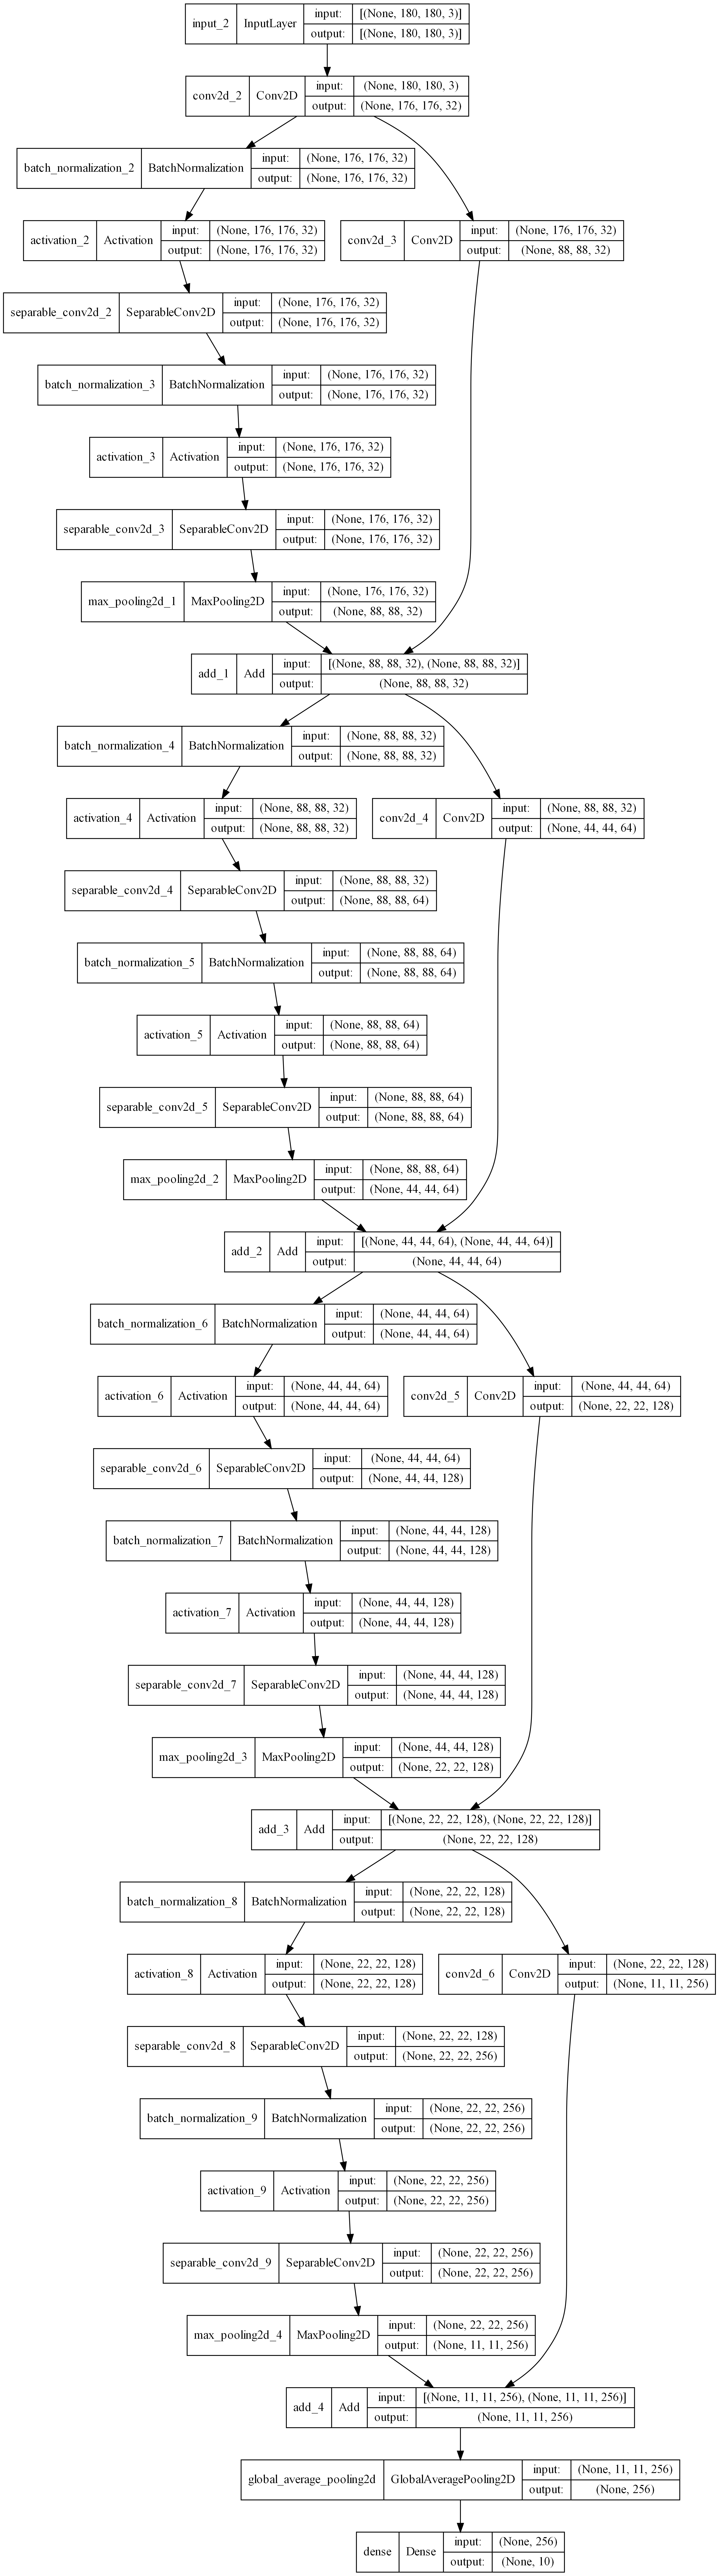

In [9]:
show_model(model)